<a href="https://www.kaggle.com/code/ryanlliu/exploratory-data-analysis?scriptVersionId=157525856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to dataset
dataset_path = "/kaggle/input/jnu-ifm-for-segment-pubic-symphysis-fetal-head/dataset"

os.listdir(dataset_path)

['enhance_mask', 'frame_label.csv', 'mask', 'image']

In [3]:
# check the number of frame images and mask
img_paths = []
mask_paths = []
mask_enhance_paths = []

imgs_path = os.path.join(dataset_path, 'image')

for filename in os.listdir(imgs_path):
  img_path = os.path.join(imgs_path, filename)
  if os.path.isfile(img_path):
    img_paths.append(img_path)
    
mask_path = os.path.join(dataset_path, 'mask')

for filename in os.listdir(mask_path):
  img_path = os.path.join(mask_path, filename)
  if os.path.isfile(img_path):
    mask_paths.append(img_path)
    
enhance_mask_path = os.path.join(dataset_path, 'enhance_mask')

for filename in os.listdir(enhance_mask_path):
  img_path = os.path.join(mask_path, filename)
  if os.path.isfile(img_path):
    mask_enhance_paths.append(img_path)



print(f'{len(img_paths)} images')
print(f'{len(mask_paths)} masks')
print(f'{len(mask_enhance_paths)} enhance masks')

6224 images
6224 masks
6224 enhance masks


# Exploration

## Image data
- **Recap**:
  - The images in the image folder have undergone basic preprocessing. After cropping and overwriting operations, the original interface toolbar and text information in the image are removed.
  - The processed size is 1295*1026.
  - In order to prevent information loss, the downsampling process is not performed. At the same time, it has been converted into a grayscale image, which can be directly read in grayscale format when using it.


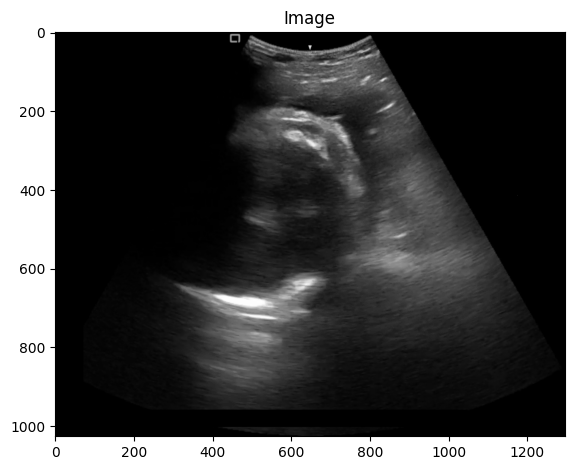

In [4]:
# Randomly choose 1 image
rand_img_path = np.random.choice(img_paths, size=1)[0]
img = plt.imread(rand_img_path)
plt.imshow(img, cmap="gray")
plt.title(f'Image')
plt.tight_layout()
plt.show()

## Mask data
- The image in the mask folder may look completely black due to the low label value (pixel value 7-SP, 8-Head).

In [5]:
# Randomly choose 1 image
mask_path = np.random.choice(mask_paths, size=1)[0]
img = plt.imread(mask_path)
np.unique(img)

array([0.        , 0.02745098, 0.03137255], dtype=float32)

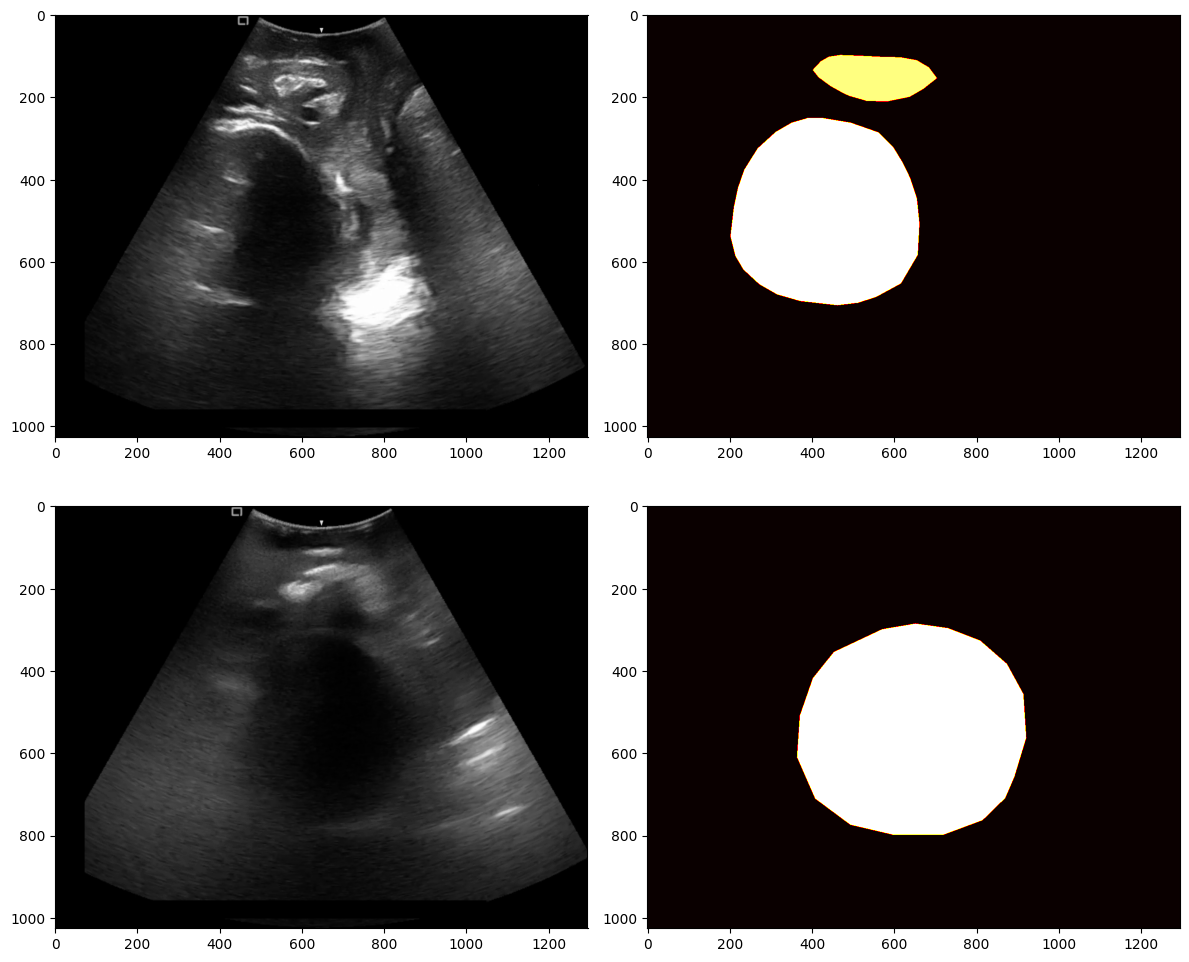

In [6]:
# Visualize random samples with corresponding images
sample_masks = np.random.choice(mask_paths, size=2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, mask_path in enumerate(sample_masks):
    mask = plt.imread(mask_path)

    # Find corresponding image file (assuming same naming pattern)
    img_path = mask_path.replace("_mask", "").replace("mask", "image")
    img = plt.imread(img_path)

    axes[i, 0].imshow(img, cmap="gray")

    axes[i, 1].imshow(mask, cmap="hot")

plt.tight_layout()
plt.show()

# Enhance mask

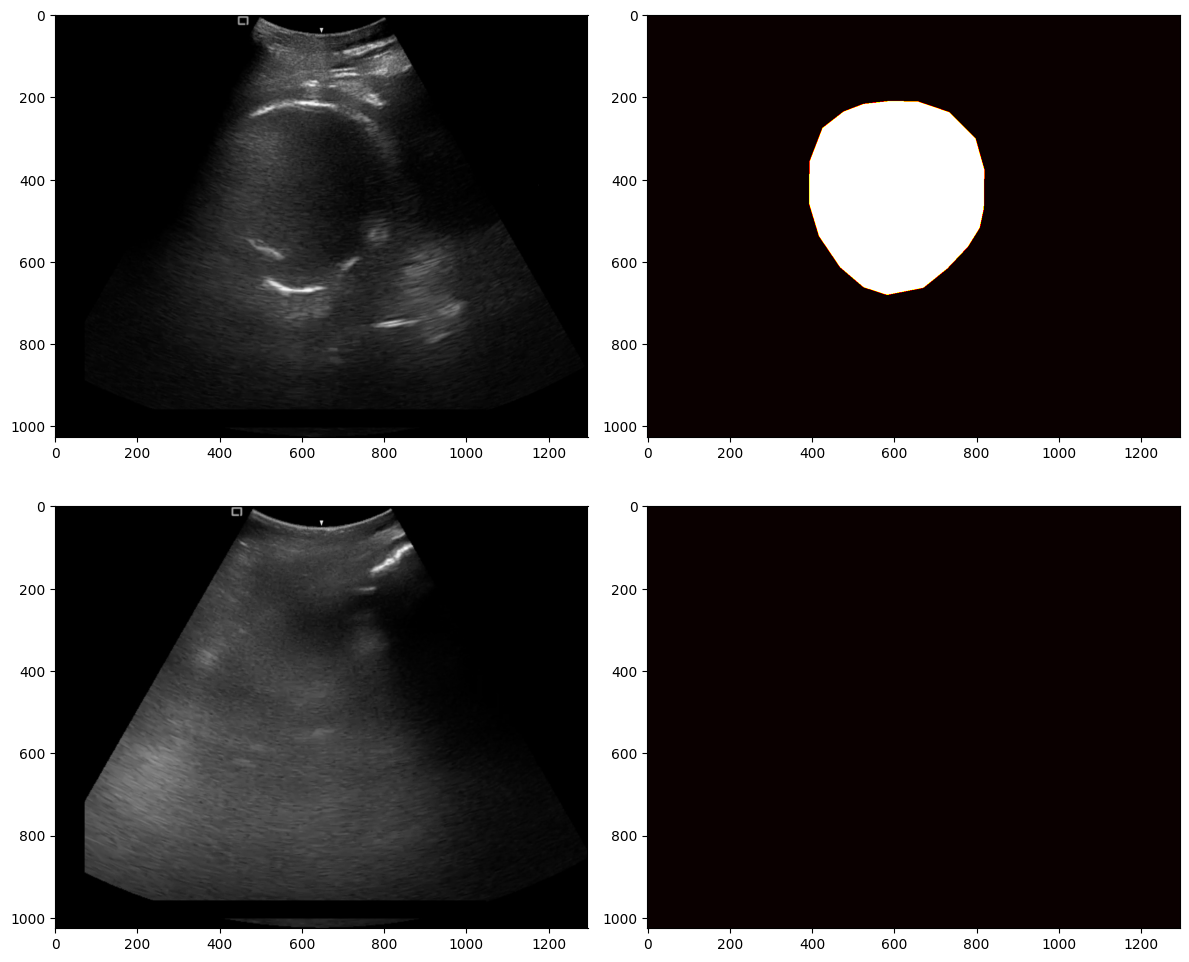

In [7]:
# Visualize random samples with corresponding images
sample_enhance_masks = np.random.choice(mask_enhance_paths, size=2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, mask_path in enumerate(sample_enhance_masks):
    mask = plt.imread(mask_path)

    # Find corresponding image file (assuming same naming pattern)
    img_path = mask_path.replace("_mask", "").replace("mask", "image")
    img = plt.imread(img_path)

    axes[i, 0].imshow(img, cmap="gray")

    axes[i, 1].imshow(mask, cmap="hot")

plt.tight_layout()
plt.show()

In [8]:
# Randomly choose 1 image
enhance_mask = np.random.choice(mask_enhance_paths, size=1)[0]
img = plt.imread(enhance_mask)
np.unique(img)

array([0.        , 0.02745098, 0.03137255], dtype=float32)

## Label distribution
- **Recap**: Frame_label frame label 3-None, 4-OnlySP, 5-OnlyHead, 6-SP+Head in framelabel.csv

Frame label count:
frame_label
6    3743
5    1136
3    1022
4     323
Name: count, dtype: int64
Frame label distribution:
frame_label
6    60.138175
5    18.251928
3    16.420308
4     5.189589
Name: count, dtype: float64


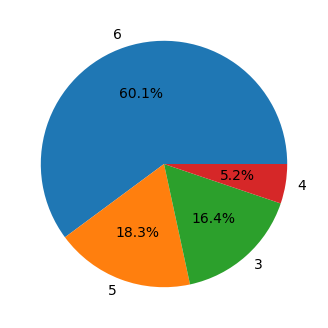

In [9]:
# Analyze frame label distribution across all videos
df = pd.read_csv('/kaggle/input/jnu-ifm-for-segment-pubic-symphysis-fetal-head/dataset/frame_label.csv')
label_counts = df["frame_label"].value_counts()
label_percentages = (label_counts / len(df)) * 100

print("Frame label count:")
print(label_counts)
print("Frame label distribution:")
print(label_percentages)

# Plot pie chart using seaborn
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels = label_counts.index, autopct='%1.1f%%')
plt.show()